# 서울시 상권분석 데이터 시각화 (개선 버전)

개선사항:
- 다양한 시각화 추가
- 인터랙티브 그래프 옵션
- 에러 처리 강화
- 그래프 저장 기능
- 통계 분석 추가

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


# 그래프 스타일 설정
# sns.set_style('whitegrid')
# plt.rcParams['figure.dpi'] = 100

print("라이브러리 로드 완료")

라이브러리 로드 완료


In [20]:
# 데이터 로드 함수
def load_data(source='local', url=None):
    """
    데이터 로드 (로컬 또는 URL)
    
    Args:
        source: 'local' 또는 'url'
        url: URL 소스인 경우 URL 주소
    
    Returns:
        DataFrame
    """
    try:
        if source == 'url' and url:
            df = pd.read_csv(url, encoding='cp949')
            print(f"URL에서 데이터 로드 완료: {len(df)} 행")
        else:
            df = pd.read_csv('seoul_store.csv', encoding='cp949')
            print(f"로컬에서 데이터 로드 완료: {len(df)} 행")
        
        return df
    except FileNotFoundError:
        print("오류: seoul_store.csv 파일을 찾을 수 없습니다.")
        return None
    except Exception as e:
        print(f"데이터 로드 오류: {e}")
        return None

# 데이터 로드 (로컬 파일 우선, 없으면 URL)
df = load_data('local')

if df is None:
    print("\nURL에서 데이터 로드 시도...")
    url = 'https://raw.githubusercontent.com/kyuyounglee-20250607/python-study-git/main/seoul_store.csv'
    df = load_data('url', url)

if df is not None:
    print("\n=== 데이터 기본 정보 ===")
    print(df.head())
    print(f"\n컬럼 목록: {list(df.columns)}")
    print(f"\n데이터 shape: {df.shape}")

로컬에서 데이터 로드 완료: 1000 행

=== 데이터 기본 정보 ===
   기준_년분기_코드 서비스_업종_코드_명      당월_매출_금액     당월_매출_건수      주중_매출_금액  \
0      20243      스포츠 강습  1.256220e+11     560552.0  1.148398e+11   
1      20243          여관  6.684655e+10    1268476.0  4.588294e+10   
2      20243         고시원  2.194135e+08        429.0  1.568745e+08   
3      20243         편의점  1.131581e+12  165985978.0  8.347921e+11   
4      20243        반찬가게  8.342301e+11   32501744.0  6.961403e+11   

       주말_매출_금액     월요일_매출_금액     화요일_매출_금액     수요일_매출_금액     목요일_매출_금액  ...  \
0  1.078224e+10  3.065966e+10  2.268301e+10  1.995960e+10  1.990580e+10  ...   
1  2.096361e+10  9.835197e+09  8.660760e+09  8.726616e+09  9.059335e+09  ...   
2  6.253908e+07  5.600508e+07  1.862526e+07  1.862526e+07  3.180943e+07  ...   
3  2.967892e+11  1.723568e+11  1.594869e+11  1.626247e+11  1.650212e+11  ...   
4  1.380897e+11  1.574815e+11  1.266496e+11  1.375109e+11  1.304588e+11  ...   

   시간대_17~21_매출_건수  시간대_21~24_매출_건수     남성_매출_건수    여성_매출_건수  

In [21]:
# 업종별 매출 분석
if df is not None and '서비스_업종_코드_명' in df.columns and '당월_매출_금액' in df.columns:
    # 상위 10개 업종
    top10 = df.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().nlargest(10)
    top10_df = top10.reset_index()
    top10_df.columns = ['서비스_업종_코드_명', '당월_매출_금액']
    
    print("\n=== 업종별 매출 상위 10개 ===")
    for idx, row in top10_df.iterrows():
        print(f"{idx+1}. {row['서비스_업종_코드_명']}: {row['당월_매출_금액']:,.0f}원")
    
    # 통계 정보
    print(f"\n총 매출액: {top10_df['당월_매출_금액'].sum():,.0f}원")
    print(f"평균 매출액: {top10_df['당월_매출_금액'].mean():,.0f}원")
    print(f"중간값: {top10_df['당월_매출_금액'].median():,.0f}원")
else:
    print("필요한 컬럼이 없습니다.")


=== 업종별 매출 상위 10개 ===
1. 한식음식점: 47,605,437,262,460원
2. 일반의류: 27,122,492,144,522원
3. 일반의원: 23,064,841,472,639원
4. 의약품: 21,270,488,539,914원
5. 편의점: 17,736,417,102,485원
6. 슈퍼마켓: 17,050,824,631,915원
7. 컴퓨터및주변장치판매: 16,296,111,434,066원
8. 수산물판매: 15,964,637,819,455원
9. 육류판매: 12,647,473,817,777원
10. 청과상: 11,799,581,739,771원

총 매출액: 210,558,305,965,004원
평균 매출액: 21,055,830,596,500원
중간값: 17,393,620,867,200원


그래프 저장: top10_sales_barplot_20251011_151932.png


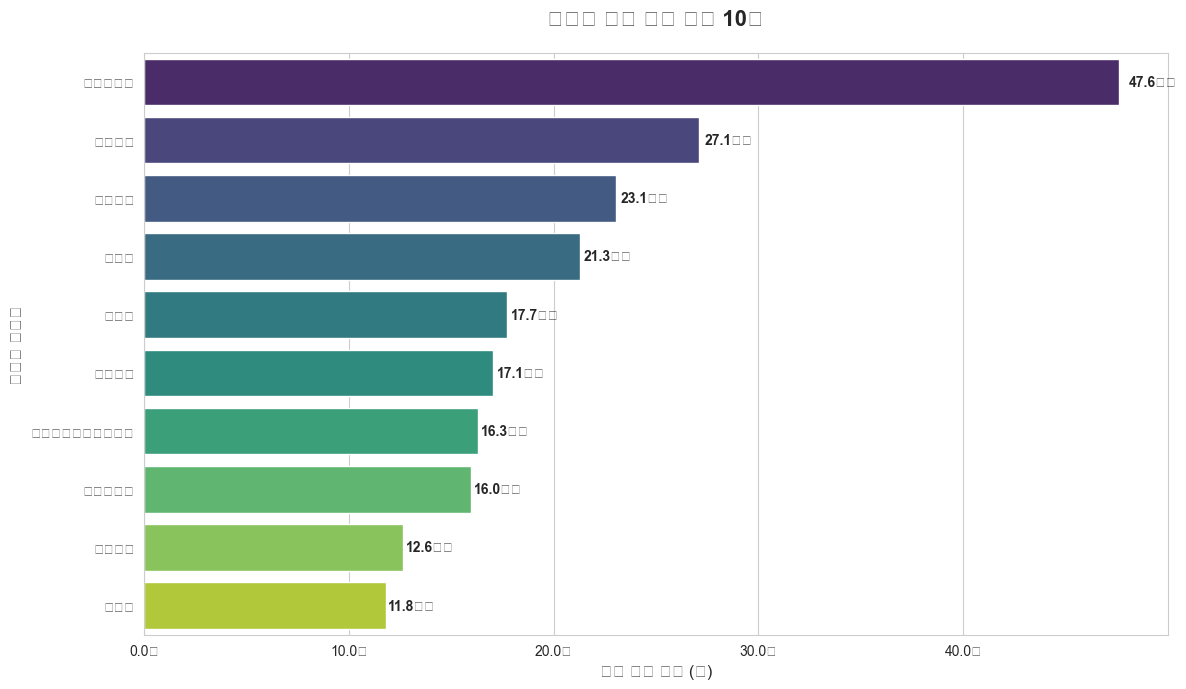

In [22]:
# 시각화 1: 가로 막대 그래프
if df is not None and '서비스_업종_코드_명' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # 막대 그래프
    bars = sns.barplot(
        data=top10_df,
        y='서비스_업종_코드_명',
        x='당월_매출_금액',
        palette='viridis',
        hue='서비스_업종_코드_명',
        legend=False,
        ax=ax
    )
    
    # 제목 및 라벨
    ax.set_title('업종별 당월 매출 상위 10개', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('당월 매출 금액 (원)', fontsize=12)
    ax.set_ylabel('서비스 업종명', fontsize=12)
    
    # 막대 위 값 표시 (개선)
    for i, (idx, row) in enumerate(top10_df.iterrows()):
        value = row['당월_매출_금액']
        ax.text(
            value + value * 0.01,
            i,
            f'{value/1e12:.1f}조원',  # 조 단위로 표시
            va='center',
            fontsize=10,
            fontweight='bold'
        )
    
    # x축 포맷 (조 단위)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e12:.1f}조'))
    
    plt.tight_layout()
    
    # 그래프 저장
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'top10_sales_barplot_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"그래프 저장: {filename}")
    
    plt.show()

그래프 저장: top10_sales_pie_20251011_151933.png


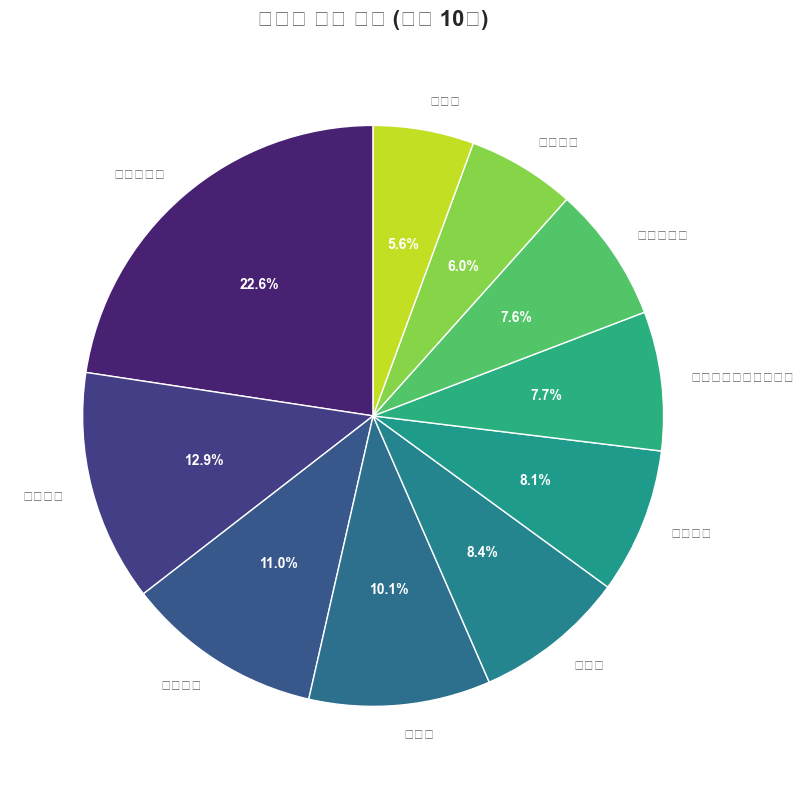

In [23]:
# 시각화 2: 파이 차트
if df is not None and '서비스_업종_코드_명' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 파이 차트
    colors = sns.color_palette('viridis', len(top10_df))
    wedges, texts, autotexts = ax.pie(
        top10_df['당월_매출_금액'],
        labels=top10_df['서비스_업종_코드_명'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )
    
    # 퍼센트 텍스트 스타일
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    ax.set_title('업종별 매출 비율 (상위 10개)', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    # 그래프 저장
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'top10_sales_pie_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"그래프 저장: {filename}")
    
    plt.show()

그래프 저장: weekday_pattern_20251011_151933.png


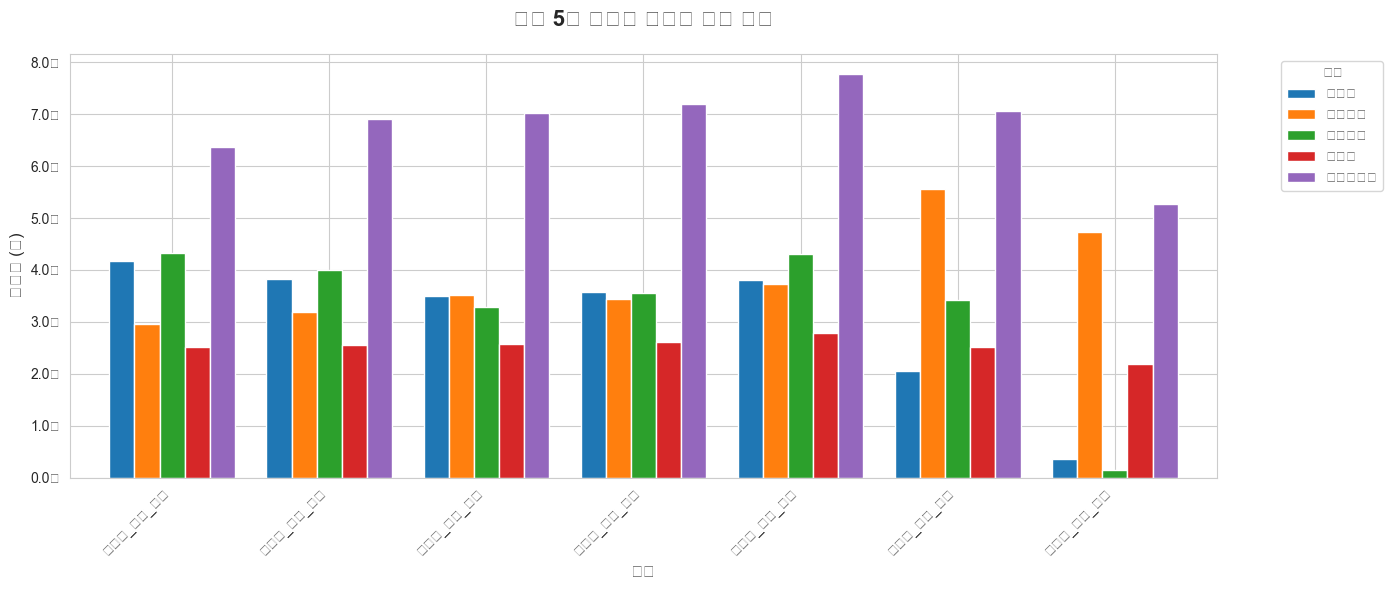

In [24]:
# 추가 분석: 요일별 매출 패턴
if df is not None:
    weekday_columns = [col for col in df.columns if '요일_매출_금액' in col]
    
    if weekday_columns:
        # 상위 5개 업종의 요일별 매출
        top5_industries = top10_df.head(5)['서비스_업종_코드_명'].tolist()
        df_top5 = df[df['서비스_업종_코드_명'].isin(top5_industries)]
        
        # 요일별 매출 집계
        weekday_sales = df_top5.groupby('서비스_업종_코드_명')[weekday_columns].sum()
        
        # 시각화
        fig, ax = plt.subplots(figsize=(14, 6))
        
        weekday_sales.T.plot(kind='bar', ax=ax, width=0.8)
        
        ax.set_title('상위 5개 업종의 요일별 매출 패턴', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('요일', fontsize=12)
        ax.set_ylabel('매출액 (원)', fontsize=12)
        ax.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e12:.1f}조'))
        
        # x축 라벨 회전
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        
        # 그래프 저장
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f'weekday_pattern_{timestamp}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"그래프 저장: {filename}")
        
        plt.show()

In [25]:
# 분석 요약
print("\n" + "="*50)
print("분석 요약")
print("="*50)
print(f"\n1. 총 분석 업종 수: {df['서비스_업종_코드_명'].nunique()}개")
print(f"2. 총 데이터 레코드: {len(df)}개")
print(f"3. 상위 10개 업종 총 매출: {top10_df['당월_매출_금액'].sum()/1e12:.2f}조원")
print(f"4. 1위 업종: {top10_df.iloc[0]['서비스_업종_코드_명']}")
print(f"5. 1위 업종 매출: {top10_df.iloc[0]['당월_매출_금액']/1e12:.2f}조원")
print("\n분석 완료!")


분석 요약

1. 총 분석 업종 수: 63개
2. 총 데이터 레코드: 1000개
3. 상위 10개 업종 총 매출: 210.56조원
4. 1위 업종: 한식음식점
5. 1위 업종 매출: 47.61조원

분석 완료!
